In [1]:
# %matplotlib notebook
import os
os.chdir('../')  # set the working directory
os.getcwd()

'/home/yixing/code/project_work/sobot-rimulator'

In [2]:
import scripts.dataset_g2o.load_graph as load_graph
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams["figure.figsize"] = (7.0, 7.0)

In [3]:
posegraph_intel = load_graph.read_data("./scripts/dataset_g2o/input_INTEL_g2o.g2o")
print ("Name: {0}, #Vertices: {1}, #Edges: {2}".format("INTEL", 
                    len(posegraph_intel.vertices), len(posegraph_intel.edges)))
posegraph_mitb = load_graph.read_data("./scripts/dataset_g2o/input_MITb_g2o.g2o")
print ("Name: {0}, #Vertices: {1}, #Edges: {2}".format("MITb", 
                    len(posegraph_mitb.vertices), len(posegraph_mitb.edges)))
posegraph_m3500 = load_graph.read_data("./scripts/dataset_g2o/input_M3500_g2o.g2o")
print ("Name: {0}, #Vertices: {1}, #Edges: {2}".format("M3500", 
                    len(posegraph_m3500.vertices), len(posegraph_m3500.edges)))

solver = "spsolve"  #  choleskey or spsolve

Name: INTEL, #Vertices: 1228, #Edges: 1483
Name: MITb, #Vertices: 808, #Edges: 827
Name: M3500, #Vertices: 3500, #Edges: 5453


In [4]:
time_cost = list()
def draw(graph, title):
    """
    Visualize the graph
    """
    global_error =  graph.compute_global_error()
    time_cost.append((title, 0, 0, 0, global_error))
    # draw vertices
    vertices = []
    for v in graph.vertices:
        x, y = np.squeeze(v.pose[0:2, 0])
        vertices.append((x, y))

    # draw edges
    for e in graph.edges:
        x1, y1 = np.squeeze(e.vertex1.pose[0:2, 0])
        x2, y2 = np.squeeze(e.vertex2.pose[0:2, 0])
        plt.plot([x1, x2], [y1, y2], 'k', linewidth=0.5)

    num_vertices = len(vertices)
    vx, vy = zip(*vertices)
    plt.plot(vx, vy, 'ok', label='Vertex ({0})'.format(num_vertices), fillstyle='none', markersize=5)
    plt.suptitle(title)
    plt.title("GLOBAL ERROR: {0:.2f}".format(global_error))
    plt.axis("equal")
    plt.legend(loc='upper left')
    plt.savefig('./scripts/fig/{0}0.eps'.format(title), format='eps')

title = ""
def callback_function(graph_vertices, graph_edges, info):
    global_error = info["global_error"]
    iteration = info["iteration"]
    linearize_time_cost = info["linearize_time_cost"]
    solve_time_cost = info["solve_time_cost"]
    time_cost.append((title, iteration, linearize_time_cost, solve_time_cost, global_error))
    print ("TIME COST: \nLINEARIZATION: {0}s,  \
           \nSOLVE LINEAR SYATEM: {1}s".format(linearize_time_cost, solve_time_cost))
    vertices = []
    for v in graph_vertices:
        x, y = np.squeeze(v.pose[0:2, 0])
        vertices.append((x, y))

    for e in graph_edges:
        x1, y1 = np.squeeze(e.vertex1.pose[0:2, 0])
        x2, y2 = np.squeeze(e.vertex2.pose[0:2, 0])
        plt.plot([x1, x2], [y1, y2], 'k', linewidth=0.5)

    num_vertices = len(vertices)
    vx, vy = zip(*vertices)
    plt.plot(vx, vy, 'ok', label='Vertex ({0})'.format(num_vertices), fillstyle='none', markersize=5)
    plt.suptitle(title)
    plt.title("GLOBAL ERROR: {0:.2f}, ITERATION {1}".format(global_error, iteration))
    plt.axis("equal")
    plt.legend(loc='upper left')
    plt.savefig('./scripts/fig/{0}{1}.eps'.format(title, iteration), format='eps')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


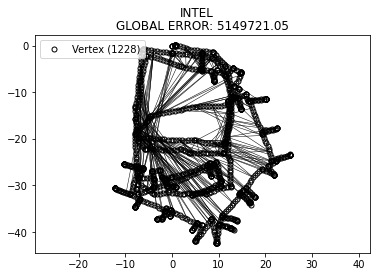

In [5]:
draw(posegraph_intel, "INTEL")

TIME COST: 
LINEARIZATION: 0.5183925628662109s,             
SOLVE LINEAR SYATEM: 0.006428956985473633s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


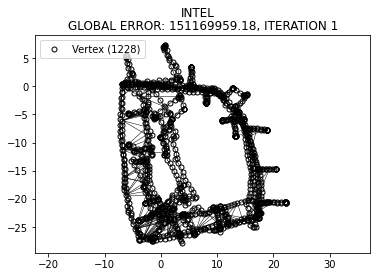

TIME COST: 
LINEARIZATION: 0.2993748188018799s,             
SOLVE LINEAR SYATEM: 0.006452322006225586s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


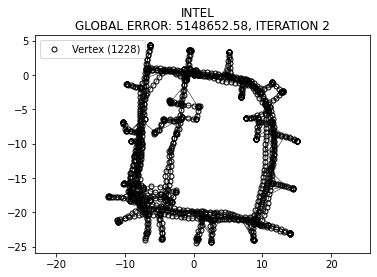

TIME COST: 
LINEARIZATION: 0.33022212982177734s,             
SOLVE LINEAR SYATEM: 0.00698089599609375s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


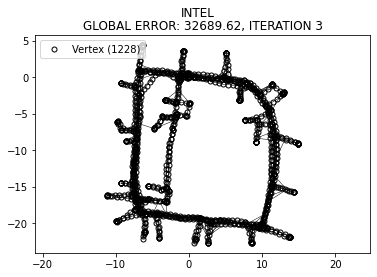

TIME COST: 
LINEARIZATION: 0.43564319610595703s,             
SOLVE LINEAR SYATEM: 0.008457422256469727s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


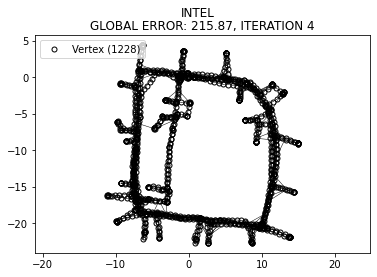

TIME COST: 
LINEARIZATION: 0.2589399814605713s,             
SOLVE LINEAR SYATEM: 0.006207466125488281s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


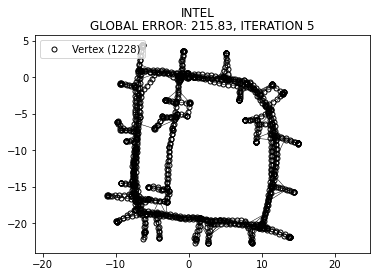

TIME COST: 
LINEARIZATION: 0.27781057357788086s,             
SOLVE LINEAR SYATEM: 0.009013652801513672s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


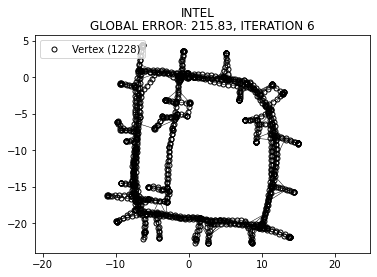

TIME COST: 
LINEARIZATION: 0.26247215270996094s,             
SOLVE LINEAR SYATEM: 0.006844997406005859s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


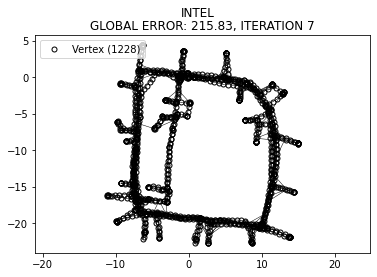

TIME COST: 
LINEARIZATION: 0.2658255100250244s,             
SOLVE LINEAR SYATEM: 0.006217002868652344s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


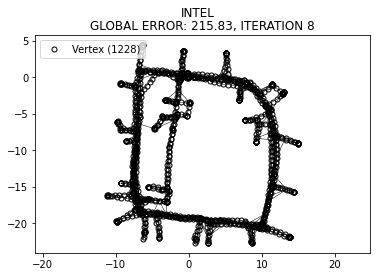

TIME COST: 
LINEARIZATION: 0.28653693199157715s,             
SOLVE LINEAR SYATEM: 0.008396148681640625s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


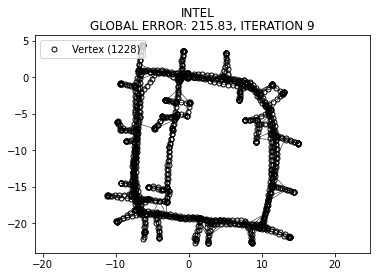

TIME COST: 
LINEARIZATION: 0.25809431076049805s,             
SOLVE LINEAR SYATEM: 0.00598907470703125s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


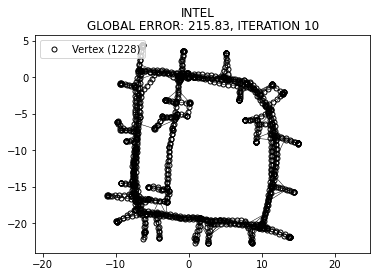

215.83353450516364

In [6]:
title = "INTEL"
posegraph_intel.graph_optimization(max_iter = 10, damp_factor=5, 
                                   solver=solver, callback = callback_function, epsilon = 0)
#draw(posegraph_intel, "INTEL")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


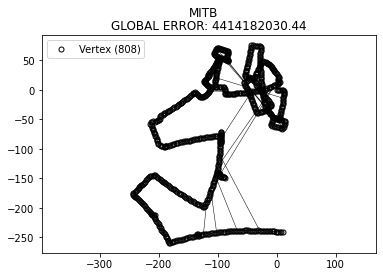

In [7]:
draw(posegraph_mitb, "MITB")

TIME COST: 
LINEARIZATION: 0.16639423370361328s,             
SOLVE LINEAR SYATEM: 0.008179426193237305s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


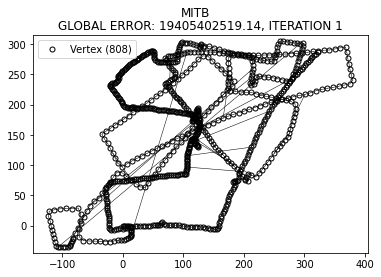

TIME COST: 
LINEARIZATION: 0.22032928466796875s,             
SOLVE LINEAR SYATEM: 0.0036644935607910156s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


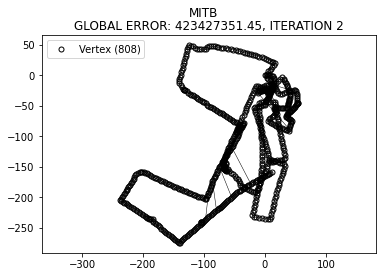

TIME COST: 
LINEARIZATION: 0.1400589942932129s,             
SOLVE LINEAR SYATEM: 0.0036966800689697266s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


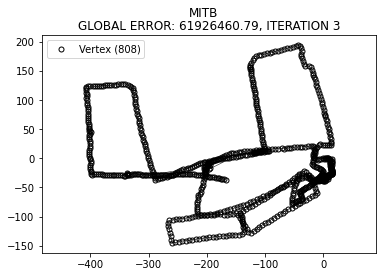

TIME COST: 
LINEARIZATION: 0.17709136009216309s,             
SOLVE LINEAR SYATEM: 0.004018306732177734s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


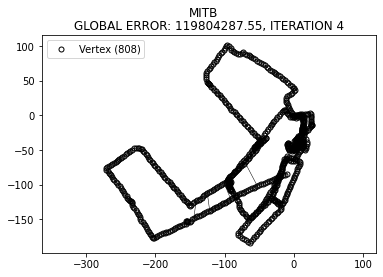

TIME COST: 
LINEARIZATION: 0.1890256404876709s,             
SOLVE LINEAR SYATEM: 0.0038514137268066406s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


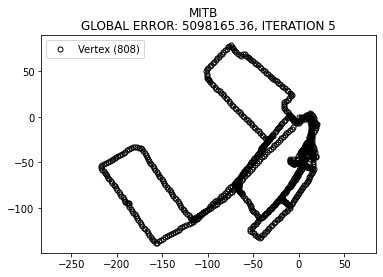

TIME COST: 
LINEARIZATION: 0.22023248672485352s,             
SOLVE LINEAR SYATEM: 0.0038607120513916016s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


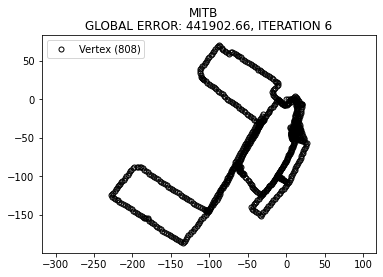

TIME COST: 
LINEARIZATION: 0.15414714813232422s,             
SOLVE LINEAR SYATEM: 0.005036115646362305s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


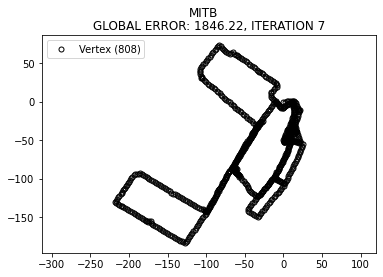

TIME COST: 
LINEARIZATION: 0.18396425247192383s,             
SOLVE LINEAR SYATEM: 0.003947019577026367s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


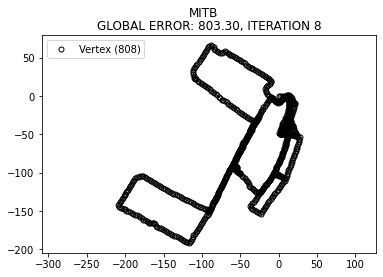

TIME COST: 
LINEARIZATION: 0.13910222053527832s,             
SOLVE LINEAR SYATEM: 0.003809690475463867s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


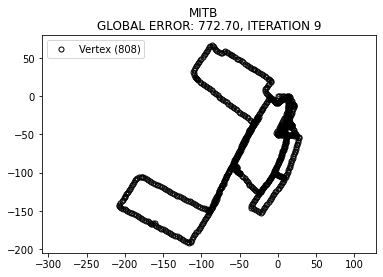

TIME COST: 
LINEARIZATION: 0.2088329792022705s,             
SOLVE LINEAR SYATEM: 0.0034198760986328125s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


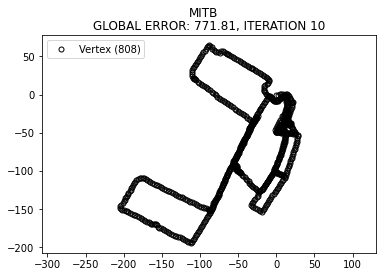

771.8116874364089

In [8]:
title = "MITB"
posegraph_mitb.graph_optimization(max_iter = 10, damp_factor=5, 
                                   solver=solver, callback = callback_function, epsilon = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


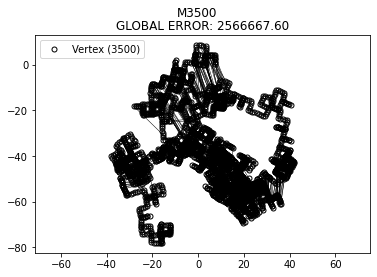

In [9]:
draw(posegraph_m3500, "M3500")

TIME COST: 
LINEARIZATION: 1.4154596328735352s,             
SOLVE LINEAR SYATEM: 0.047148704528808594s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


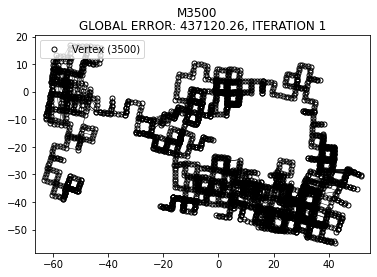

TIME COST: 
LINEARIZATION: 1.3376057147979736s,             
SOLVE LINEAR SYATEM: 0.047797203063964844s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


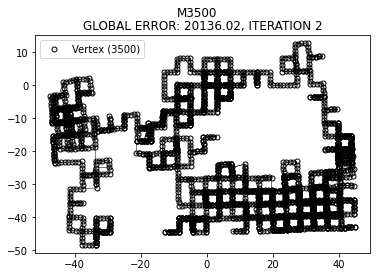

TIME COST: 
LINEARIZATION: 1.288611650466919s,             
SOLVE LINEAR SYATEM: 0.0338740348815918s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


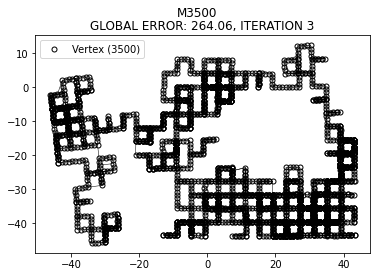

TIME COST: 
LINEARIZATION: 2.004749298095703s,             
SOLVE LINEAR SYATEM: 0.03658795356750488s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


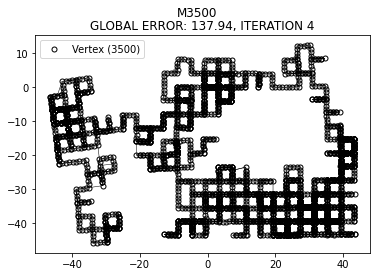

TIME COST: 
LINEARIZATION: 1.1781327724456787s,             
SOLVE LINEAR SYATEM: 0.045350074768066406s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


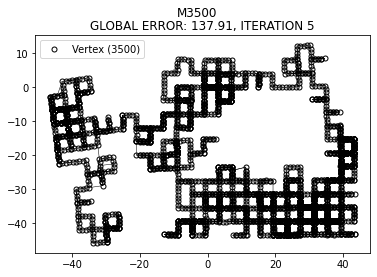

TIME COST: 
LINEARIZATION: 1.0988821983337402s,             
SOLVE LINEAR SYATEM: 0.04068899154663086s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


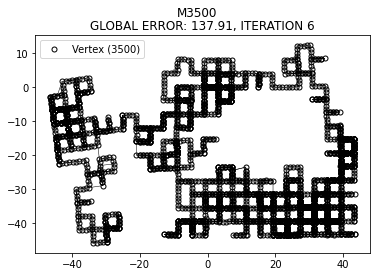

TIME COST: 
LINEARIZATION: 1.0556738376617432s,             
SOLVE LINEAR SYATEM: 0.03897452354431152s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


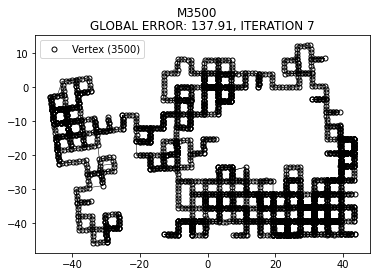

TIME COST: 
LINEARIZATION: 1.2821245193481445s,             
SOLVE LINEAR SYATEM: 0.030304670333862305s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


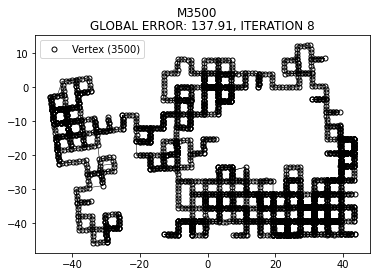

TIME COST: 
LINEARIZATION: 1.3937320709228516s,             
SOLVE LINEAR SYATEM: 0.03345060348510742s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


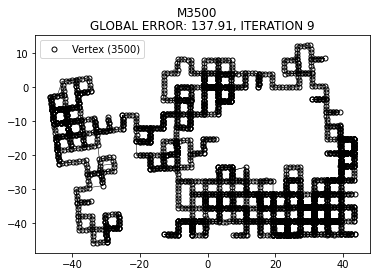

TIME COST: 
LINEARIZATION: 1.091583013534546s,             
SOLVE LINEAR SYATEM: 0.03122401237487793s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


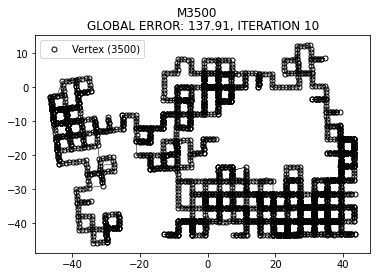

137.91296010135034

In [10]:
title = "M3500"
posegraph_m3500.graph_optimization(max_iter = 10, damp_factor=5, 
                                   solver=solver, callback = callback_function, epsilon = 0)

In [11]:
import pandas as pd
df = pd.DataFrame(data = time_cost, columns = ["name", "iteration", "linearization_time_cost", "solve_time_cost", "global_error"])
df["solver"] = solver
df.to_csv("./scripts/result/time_cost_g2o_{0}.csv".format(solver), index = False)
print (df)

     name  iteration  linearization_time_cost  solve_time_cost  global_error  \
0   INTEL          0                 0.000000         0.000000  5.149721e+06   
1   INTEL          1                 0.518393         0.006429  1.511700e+08   
2   INTEL          2                 0.299375         0.006452  5.148653e+06   
3   INTEL          3                 0.330222         0.006981  3.268962e+04   
4   INTEL          4                 0.435643         0.008457  2.158657e+02   
5   INTEL          5                 0.258940         0.006207  2.158336e+02   
6   INTEL          6                 0.277811         0.009014  2.158338e+02   
7   INTEL          7                 0.262472         0.006845  2.158341e+02   
8   INTEL          8                 0.265826         0.006217  2.158334e+02   
9   INTEL          9                 0.286537         0.008396  2.158335e+02   
10  INTEL         10                 0.258094         0.005989  2.158335e+02   
11   MITB          0                 0.0

In [14]:
df = pd.read_csv("./scripts/result/time_cost_g2o_{0}.csv".format(solver))
print (df)

     name  iteration  linearization_time_cost  solve_time_cost  global_error  \
0   INTEL          0                 0.000000         0.000000  5.149721e+06   
1   INTEL          1                 0.518393         0.006429  1.511700e+08   
2   INTEL          2                 0.299375         0.006452  5.148653e+06   
3   INTEL          3                 0.330222         0.006981  3.268962e+04   
4   INTEL          4                 0.435643         0.008457  2.158657e+02   
5   INTEL          5                 0.258940         0.006207  2.158336e+02   
6   INTEL          6                 0.277811         0.009014  2.158338e+02   
7   INTEL          7                 0.262472         0.006845  2.158341e+02   
8   INTEL          8                 0.265826         0.006217  2.158334e+02   
9   INTEL          9                 0.286537         0.008396  2.158335e+02   
10  INTEL         10                 0.258094         0.005989  2.158335e+02   
11   MITB          0                 0.0